In [1]:
#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import datetime

import seaborn as sns
sns.set()

# Open the data set

In [2]:
dou = pd.read_csv('dou.csv')
dou

,idxs,title,date,typ,origin,section,subject_theme,health_issue,covid,doc_cited,direct_mention,precise_mention,imprecise_mention,generic_mention,hard_soft
0,9728,"PORTARIA Nº 4, DE 27 DE MARÇO DE 2020",2020-04-01,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,True,Rational use of personal protective equipment ...,Direct,No,Yes,No,Soft norm
1,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04-01,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,True,Declaration of Pandemic Status,Direct,No,Yes,No,Soft norm
2,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04-01,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,True,COVID-19 Public Health Emergency of Internatio...,Direct,Yes,No,No,Soft norm
3,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04-01,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,True,Rational use of personal protective equipment ...,Direct,No,Yes,No,Soft norm
4,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04-01,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,True,Declaration of Pandemic Status,Direct,No,Yes,No,Soft norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3209661.0,"RESOLUÇÃO CREF4/SP nº 151, de 11 de julho de 2022",2022-07-12 00:00:00,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Educação Física,Physical activity,No,NaN,Direct,No,Yes,No,NaN
1047,3210773.0,"RESOLUÇÃO COFEN Nº 702, de 15 de julho de 2022",2022-07-18 00:00:00,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Enfermagem,Nursing and Midwifery,No,NaN,Direct,No,Yes,No,NaN
1048,3211564.0,"RESOLUÇÃO COFEN Nº 704, DE 19 DE JULHO DE 2022",2022-07-21 00:00:00,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Enfermagem e parada cardiorrespiratoria,Nursing and Midwifery,No,NaN,Direct,No,Yes,No,NaN
1049,3211641.0,"RESOLUÇÃO CREMERJ Nº 335, DE 14 DE JULHO DE 2022",2022-07-22 00:00:00,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Médico do Trabalho,Health Workforce,No,NaN,Direct,No,Yes,No,NaN


# COVID-19 analysis

In [3]:
print(set(dou['covid'])) #check the possible answers to 'mencao_covid' question

{'True', 'Yes', 'FALSE', nan, 'No'}


In [4]:
'''
For the nan documents, it was assumed the convention of letting the value of the entry be nan if equals the
value above. Therefore, to have a list of only 'Yes' and 'No', we run the following
'''
covid_list = dou['covid'].to_list()
covid_list_clean = []

for el in covid_list:
    if el == 'True':
        covid_list_clean.append('Yes')
    elif el == 'Yes':
        covid_list_clean.append('Yes')
    elif el == 'FALSE':
        covid_list_clean.append('No')
    elif el == 'No':
        covid_list_clean.append('No')
    else:
        covid_list_clean.append(covid_list_clean[-1])
        
print(len(covid_list), len(covid_list_clean)) #check if the new list has the same size as the previous one

dou['covid'] = covid_list_clean #changes the mencao_covid column to the new one

print(set(dou['covid'])) #check if it worked

1051 1051
{'Yes', 'No'}


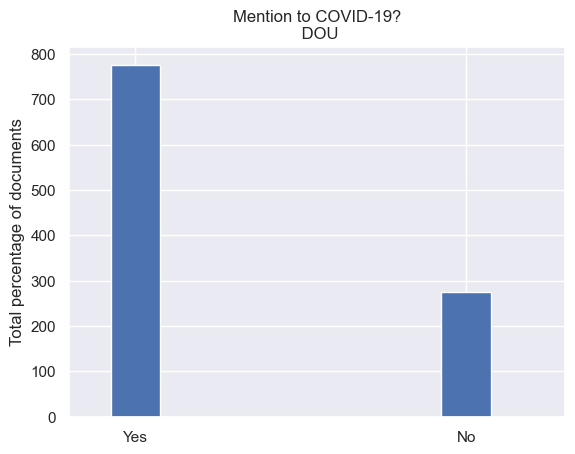

In [5]:
plt.bar(['Yes', 'No'], [len(dou[dou['covid'] == 'Yes']),len(dou[dou['covid'] == 'No'])], width = 0.15)
plt.xlim(-0.2,1.3)
plt.title('Mention to COVID-19?\n DOU')
plt.ylabel('Total percentage of documents')
plt.savefig('Graphs/covid.png',  bbox_inches='tight')
plt.show()

In [6]:
print('About ' + str(round(len(dou[dou['covid'] == 'Yes'])/len(dou)*100,2)) + '% of the documents mention COVID 19')

About 73.83% of the documents mention COVID 19


In [7]:
len(dou[dou['covid'] == 'Yes'])

776

# Major health issue 

In [8]:
hi = list(set(dou['health_issue']))
hi_count = []
for issue in hi:
    hi_count.append(len(dou[dou['health_issue'] == issue]))

In [9]:
len(hi_count), len(hi)

(44, 44)

In [10]:
hi_dic = {'Issue': hi, 'Count': hi_count}
hi_dt = pd.DataFrame(data = hi_dic)
hi_dt

,Issue,Count
0,Ageing,1
1,Food fortification,3
2,Health Budget,2
3,Palliative care,1
4,Corona Virus Disease,1
5,"Environmental crisis (global warming, pollution…)",2
6,Tuberculosis,4
7,Monkeypox,1
8,Drugs & Alcohol,3
9,Child health,5


In [11]:
hi_big = hi_dt[hi_dt['Count'] > 5]
hi_big.reset_index(drop=True, inplace=True)
hi_big

,Issue,Count
0,Other (specify),144
1,Food Safety,6
2,COVID-19,654
3,Tobacco,9
4,Health crisis (in general),20
5,Health system governance,6
6,Health Security,6
7,Vaccines and immunization,13
8,Coronavirus disease (COVID-19),84
9,Mental and behavioral disorders,14


In [12]:
corona = hi_dt[hi_dt['Issue'] == 'COVID-19']['Count'].iloc[0] + hi_dt[hi_dt['Issue'] == 'Corona Virus Disease']['Count'].iloc[0] +  hi_dt[hi_dt['Issue'] == 'Coronavirus disease (COVID-19)']['Count'].iloc[0]
other = hi_big[hi_big['Issue'] == 'Other (specify)']['Count'].iloc[0] + len(hi_dt[hi_dt['Count'] <= 5])

In [13]:
issues = ['COVID 19', 'Food Safety', 'Health Crisis', 'Health Security', 'Health System Governance',
          'Mental and Behavioral \nDisorders', 'Tobacco', 'Vaccines and Immunization', 'Other']
count = [corona, 6, 20, 6, 6, 14, 9, 13, other]

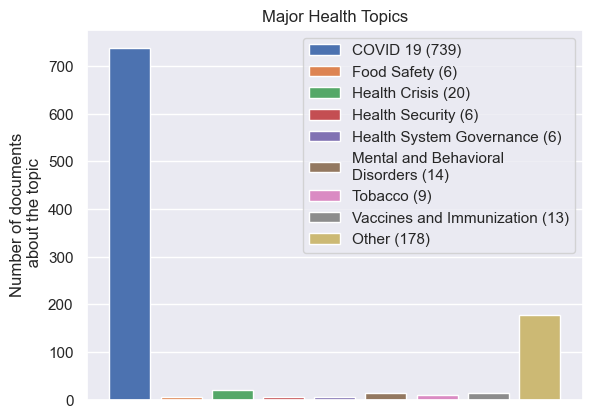

In [14]:
fig, ax =  plt.subplots(1,1) 
for i, isssue in enumerate(count):
    ax.bar(i, isssue, label = issues[i] + ' (' + str(isssue) + ')')
ax.set_ylabel('Number of documents\n about the topic')
ax.set_title('Major Health Topics')
ax.axes.get_xaxis().set_ticks([])
ax.legend()
plt.savefig('Graphs/major_health.png',  bbox_inches='tight')
plt.show()

# Documents

In [15]:
set(list(dou['doc_cited']))

{'\nDeclaration of Pandemic Status',
 '80º Term of technical cooperation for the implementation of Project “Ampliação do Acesso da População Brasileira à Atenção Básica em Saúde”',
 'Air quality guidelines: global update 2005: particulate matter, ozone, nitrogen dioxide and sulfur dioxide',
 'Alma Ata Primary Healthcare Conference',
 'Anatomical Therapeutic Chemical',
 'Anatomical Therapeutic Chemical (ATC) Classification',
 'Baby-friendly Hospital Initiative for small,\nsick and preterm newborns',
 'Baby-friendly_x000D_ Hospital Initiative',
 'Basic Agreement on Technical Assistance between the United States of Brazil and the United Nations, its Specialized Agencies and the International Atomic Energy Agency',
 'Birth defects (WHA 63.17)',
 'Breastfeeding and COVID-19',
 'CONSTITUTION OF THE WORLD HEALTH ORGANIZATION',
 'COVID-19 Public Health Emergency of International Concern',
 'COVID-19 Public Health Emergency of International Concern ; Declaration of Pandemic Status',
 'Cancer Pa

In [16]:
pandemic_status = 0
int_concern = 0
joint_fao = 0 
technical_guidance = 0
codex_alimentarius = 0
ds = 0
tobacco = 0
cons = 0
other = 0

for el in list(dou['doc_cited']):
    if type(el) == str:
        if ('Declaration of Pandemic Status' in el) or (el == 'DPS'):
            pandemic_status += 1
        elif ('COVID-19 Public Health Emergency of International Concern' in el) or ('PHEIC' in el):
            int_concern += 1
        elif 'Joint FAO/WHO' in el:
            joint_fao += 1
        elif "WHO's Technical guidance on COVID-19" in el:
            technical_guidance += 1
        elif 'Codex Alimentarius' in el:
            codex_alimentarius += 1
        elif 'Classification of Diseases' in el:
            ds += 1
        elif ('Tabaco' in el) or ('Tobacco' in el):
            tobacco += 1
        elif ('CONSTITUTION' in el):
            cons += 1
        else:
            other += 1

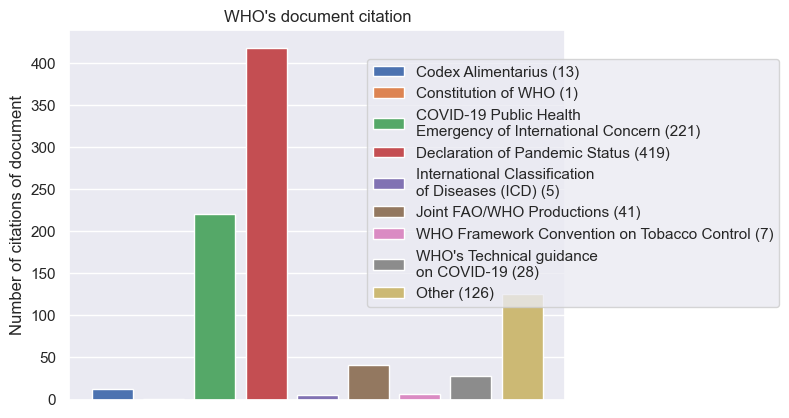

In [17]:
fig, ax =  plt.subplots(1,1)
ax.bar(-1, codex_alimentarius, label = 'Codex Alimentarius'+ ' (' + str(codex_alimentarius)+ ')')
ax.bar(0, cons, label = 'Constitution of WHO' + ' (' + str(cons)+ ')')
ax.bar(1, int_concern, label = 'COVID-19 Public Health \nEmergency of International Concern' + ' (' + str(int_concern)+ ')')
ax.bar(2, pandemic_status, label = 'Declaration of Pandemic Status' + ' (' + str(pandemic_status)+ ')')
ax.bar(3, ds, label = 'International Classification \nof Diseases (ICD)'+ ' (' + str(ds)+ ')')
ax.bar(4, joint_fao, label = 'Joint FAO/WHO Productions' + ' (' + str(joint_fao)+ ')')
ax.bar(5, tobacco, label = 'WHO Framework Convention on Tobacco Control' + ' (' + str(tobacco)+ ')')
ax.bar(6, technical_guidance, label = "WHO's Technical guidance \non COVID-19"+ ' (' + str(technical_guidance)+ ')')
ax.bar(7, other, label = 'Other' + ' (' + str(other)+ ')')


ax.set_ylabel('Number of citations of document')
ax.set_title("WHO's document citation")
ax.legend(loc = (0.6, 0.25))
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Graphs/doc_citado.png', bbox_inches='tight')
plt.show()

# Hard v. soft

In [18]:
set(dou['hard_soft'])

{'Hard', 'Hard norm', 'Soft', 'Soft norm', nan}

In [19]:
hs_list = []
for hs in dou['hard_soft']:
    if type(hs) == str:
        if 'Hard' in hs:
            hs_list.append('Hard')
        elif 'Soft' in hs:
            hs_list.append('Soft')
    else:
        hs_list.append(np.nan)

In [20]:
dou['hard_soft'] = hs_list

In [21]:
hard = len(dou[dou['hard_soft'] == 'Hard'])
soft = len(dou[dou['hard_soft'] == 'Soft'])

hard_covid = len(dou[(dou['hard_soft'] == 'Hard') & (dou['covid'] == 'Yes')])
soft_covid = len(dou[(dou['hard_soft'] == 'Soft') & (dou['covid'] == 'Yes')])

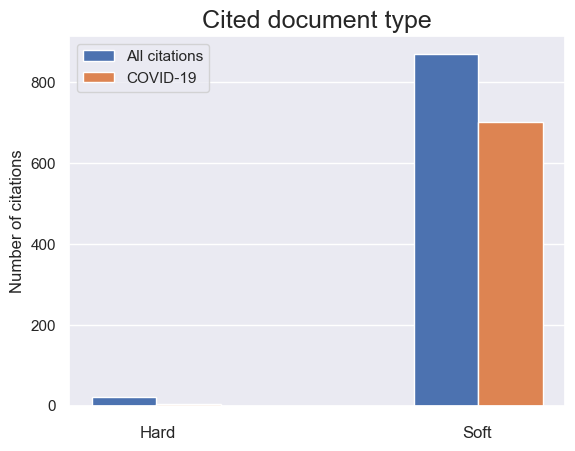

In [22]:
width = 0.2
fig, ax = plt.subplots(1,1)

ax.bar([0,1], height=[hard, soft], width=width,  label = 'All citations')
ax.bar([0 + width,1 + width], height=[hard_covid, soft_covid], width=width, label = 'COVID-19')
#ax.set_xticklabels(['Hard', 'Soft'], rotation='vertical', fontsize= 9)
ax.text(0.05, -80, 'Hard')
ax.text(1.05, -80, 'Soft')

ax.axes.get_xaxis().set_ticks([])


ax.set_title('Cited document type', fontsize=18)
ax.set_ylabel('Number of citations')
ax.legend()
plt.savefig('Graphs/hardvsoft.png')
plt.show()

# Cites specific document

In [23]:
set(dou['precise_mention'])

{'No', 'Yes', nan}

In [24]:
sp = len(dou[dou['precise_mention'] == 'Yes'])
nsp = len(dou[dou['precise_mention'] == 'No'])

sp_covid = len(dou[(dou['precise_mention'] == 'Yes') & (dou['covid'] == 'Yes')])
nsp_covid = len(dou[(dou['precise_mention'] == 'No') & (dou['covid'] == 'Yes')])

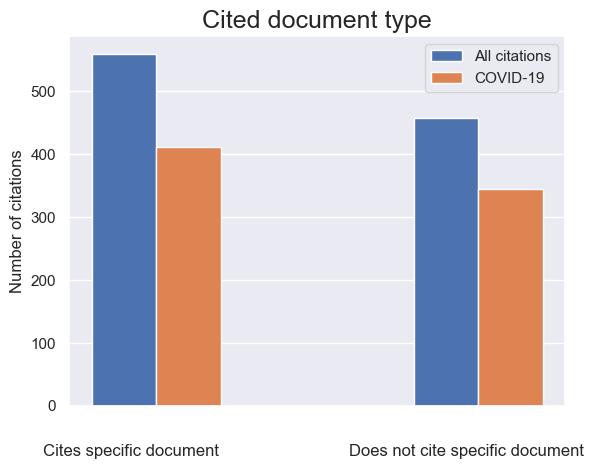

In [25]:
width = 0.2
fig, ax = plt.subplots(1,1)

ax.bar([0,1], height=[sp, nsp], width=width,  label = 'All citations')
ax.bar([0 + width,1 + width], height=[sp_covid, nsp_covid], width=width, label = 'COVID-19')
#ax.set_xticklabels(['Hard', 'Soft'], rotation='vertical', fontsize= 9)
ax.text(-0.25, -80, 'Cites specific document')
ax.text(0.70, -80, 'Does not cite specific document')

ax.axes.get_xaxis().set_ticks([])


ax.set_title('Cited document type', fontsize=18)
ax.set_ylabel('Number of citations')
ax.legend()
plt.savefig('Graphs/doc_especifico.png')
plt.show()

In [26]:
len((dou[dou['precise_mention'] == 'Yes']))

560

In [27]:
len(dou[(dou['hard_soft'] == 'Soft') & (dou['precise_mention'] == 'Yes')])

504

In [28]:
len(dou[(dou['hard_soft'] == 'Soft') & (dou['precise_mention'] == 'Yes') & (dou['covid'] == 'Yes')])

394

In [29]:
sp/len(dou)

0.532825880114177

In [30]:
len(dou[(dou['precise_mention'] == 'Yes') & (dou['covid'] == 'Yes')])/len(dou[(dou['covid'] == 'Yes')])

0.5309278350515464

In [31]:
len(dou[(dou['precise_mention'] == 'Yes') & (dou['covid'] == 'No')])/len(dou[(dou['covid'] == 'No')])

0.5381818181818182

# Mention location

In [32]:
dou['typ'].value_counts()

Resolução                                                                          435
Portaria                                                                           384
Decisão                                                                             38
Instrução Normativa                                                                 23
Ata                                                                                 20
Decreto numerado                                                                    19
Recomendação                                                                        18
Consulta Pública                                                                    17
Balanço Patrimonial                                                                 12
Ato                                                                                 12
Circular                                                                             8
Lei                                        

In [33]:
local = ['Considerandos', 'Nota explicativa', 'Exposição de motivos', 'Normativa', 'Ata de sessão de julgamento do TCU']
loc_occ = [615, 165, 18, 10, 10]
loc_occ.append(len(dou[~dou['typ'].isin(local)]))
local.append('Others')
local

['Considerandos',
 'Nota explicativa',
 'Exposição de motivos',
 'Normativa',
 'Ata de sessão de julgamento do TCU',
 'Others']

In [34]:
local = ['Considerations',
         'Explainable note',
         'Exposition of reasons',
 'Normative',
 'Session minute of \nFederal Court of Accounts',
 'Other']

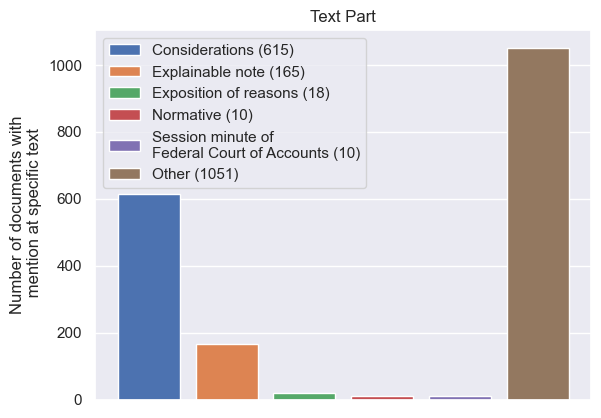

In [35]:
fig, ax =  plt.subplots(1,1) 
for i, loc in enumerate(loc_occ):
    ax.bar(i, loc, label = local[i] + ' (' + str(loc) + ')')
ax.set_ylabel('Number of documents with\n mention at specific text')
ax.set_title('Text Part')
ax.axes.get_xaxis().set_ticks([])
ax.legend()
plt.savefig('Graphs/local_de_mencao.png', bbox_inches='tight')
plt.show()

# Author

In [36]:
dou['origin'].value_counts()[:10]

Entidades de Fiscalização do Exercício das Profissões Liberais                      301
Ministério da Saúde                                                                 112
Ministério da Cidadania                                                              65
Ministério da Infraestrutura                                                         39
Ministério da Economia                                                               35
Presidência da República                                                             33
Ministério da Saúde/Agência Nacional de Vigilância Sanitária/Diretoria Colegiada     23
Ministério da Educação                                                               23
Ministério do Meio Ambiente                                                          21
Atos do Poder Executivo                                                              19
Name: origin, dtype: int64

In [37]:
set(dou['origin'])

{'/Ministério Público do Distrito Federal e Territórios/Procuradoria-Geral de Justiça/Coordenadorias das Promotorias de Justiça',
 'Agência Nacional de Saúde Suplementar',
 'Agência Nacional de Vigilância Sanitária/Diretoria Colegiada',
 'Atos do Poder Executivo',
 'Atos do Poder Judiciário',
 'Atos do Poder Judiciário/Supremo Tribunal Federal/Plenário',
 'Atos do Poder Legislativo',
 'Banco do Brasil S.A.',
 'Banco do Brasil S.A./BB Seguridade Participações S.A.',
 'Banco do Brasil S.A./Unidade de Contadoria',
 'Casa da Moeda do Brasil',
 'Comitê-Executivo de Gestão',
 'Conselho Federal de Farmácia',
 'Conselho Federal de Serviço Social',
 'Conselho Nacional de Saúde',
 'Conselho Nacional do Ministério Público',
 'Controladoria-Geral da União',
 'Câmara de Comércio Exterior/Comitê-Executivo de Gestão',
 'Diretoria Colegiada',
 'Empresa Brasil de Comunicação S.A.',
 'Empresa Brasileira de Infraestrutura Aeroportuária/Diretoria de Soluções Jurídicas e Administrativas/Superintendência de

In [38]:
min_saude = 0
exerc_prof_liberais = 0
min_cid = 0
min_infra = 0
min_eco = 0
pr = 0
min_ed = 0
ae = 0
other = 0

for el in list(dou['origin']):
    if type(el) == str:
        if 'Ministério da Saúde' in el:
            min_saude += 1
        elif 'Entidades de Fiscalização do Exercício das Profissões Liberais' in el:
            exerc_prof_liberais += 1
        elif 'Ministério da Cidadania' in el:
            min_cid += 1
        elif 'Ministério da Infraestrutura' in el:
            min_infra += 1
        elif 'Ministério da Economia' in el:
            min_eco += 1
        elif 'Presidência da República' in el:
            pr += 1
        elif 'Ministério da Educação' in el:
            min_ed += 1
        elif 'Atos do Poder Executivo' in el:
            ae += 1
        else:
            other += 1
            

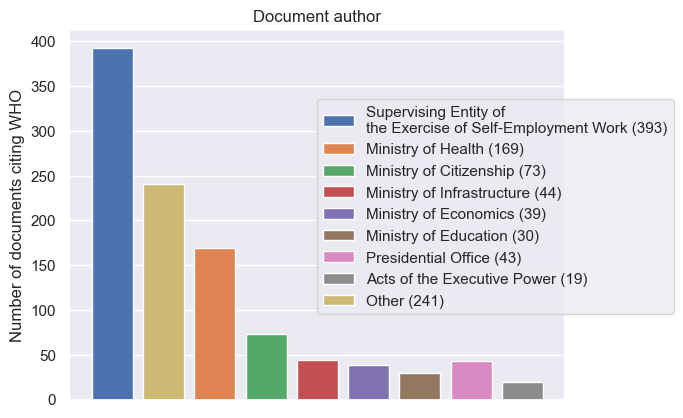

In [39]:
fig, ax =  plt.subplots(1,1)
ax.bar(-1, exerc_prof_liberais, label = 'Supervising Entity of \nthe Exercise of Self-Employment Work' + ' (' + str(exerc_prof_liberais)+ ')')
ax.bar(1, min_saude, label = 'Ministry of Health' + ' (' + str(min_saude)+ ')')
ax.bar(2, min_cid, label = 'Ministry of Citizenship' + ' (' + str(min_cid)+ ')')
ax.bar(3, min_infra, label = "Ministry of Infrastructure"+ ' (' + str(min_infra)+ ')')
ax.bar(4, min_eco, label = 'Ministry of Economics'+ ' (' + str(min_eco)+ ')')
ax.bar(5, min_ed, label = 'Ministry of Education'+ ' (' + str(min_ed)+ ')')
ax.bar(6, pr, label = 'Presidential Office'+ ' (' + str(pr)+ ')')
ax.bar(7, ae, label = 'Acts of the Executive Power'+ ' (' + str(ae)+ ')')
ax.bar(0, other, label = 'Other' + ' (' + str(other)+ ')')


ax.set_ylabel('Number of documents citing WHO')
ax.set_title("Document author")
ax.legend(loc = (0.5, 0.23))
ax.axes.get_xaxis().set_ticks([])
plt.savefig('Graphs/origins.png', bbox_inches='tight')
plt.show()

In [40]:
exerc_prof_liberais

393

In [41]:
covid_data =  dou[dou["covid"] == 'No']
exerc_prof_liberais_n_covid = 0
min_saude_n_covid = 0
for el in list(covid_data['origin']):
    if type(el) == str:
        if 'Ministério da Saúde' in el:
            min_saude_n_covid += 1
        elif 'Entidades de Fiscalização do Exercício das Profissões Liberais' in el:
            exerc_prof_liberais_n_covid += 1
print('Ministério da Saúde:', min_saude_n_covid)
print('Entidades de Fiscalização do Exercício das Profissões Liberais:', exerc_prof_liberais_n_covid)

Ministério da Saúde: 130
Entidades de Fiscalização do Exercício das Profissões Liberais: 27


# Dates

In [42]:
dates = dou['date'].to_list() #again, we clean the dates variables
dates_clean = []

for el in dates:
    if el == 'IDEM':
        dates_clean.append(dates_clean[-1])
    else:
        dates_clean.append(el)

print(len(dates), len(dates_clean)) #check if all went well


'''Change the column of the data set to a clean list'''
dou['date'] = dates_clean
dou_dates = dou.copy()
dou_dates.dropna(subset=['date'], how='all', inplace=True)


'''Puts all dates in same format'''
dates = list(dou_dates['date'])
dates_new = []
dates_in_order = []

for date in dates:
    try:
        dates_new.append(str(date).split()[0].split('-')[0] + '-' + str(date).split()[0].split('-')[1])
    except:
        dates_new.append(str(date).split()[0].split('/')[0] + '-' + str(date).split()[0].split('/')[1])

print(len(dates_new), len(dates))

dou_dates['date'] = dates_new
dou_dates['date'] = dou_dates['date'].replace(['3-31'], '2022-03') #just an error
dou_dates[dou_dates['date'] == '3-31']

1051 1051
1051 1051


,idxs,title,date,typ,origin,section,subject_theme,health_issue,covid,doc_cited,direct_mention,precise_mention,imprecise_mention,generic_mention,hard_soft


In [43]:
dou_dates

,idxs,title,date,typ,origin,section,subject_theme,health_issue,covid,doc_cited,direct_mention,precise_mention,imprecise_mention,generic_mention,hard_soft
0,9728,"PORTARIA Nº 4, DE 27 DE MARÇO DE 2020",2020-04,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,Yes,Rational use of personal protective equipment ...,Direct,No,Yes,No,Soft
1,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,Yes,Declaration of Pandemic Status,Direct,No,Yes,No,Soft
2,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,Yes,COVID-19 Public Health Emergency of Internatio...,Direct,Yes,No,No,Soft
3,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,Yes,Rational use of personal protective equipment ...,Direct,No,Yes,No,Soft
4,9729,"PORTARIA Nº 4, de 31 de março de 2020",2020-04,Portaria,Entidades de Fiscalização do Exercício das Pro...,S01,Prorrogação do prazo das medidas administrativ...,COVID-19,Yes,Declaration of Pandemic Status,Direct,No,Yes,No,Soft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3209661.0,"RESOLUÇÃO CREF4/SP nº 151, de 11 de julho de 2022",2022-07,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Educação Física,Physical activity,No,NaN,Direct,No,Yes,No,NaN
1047,3210773.0,"RESOLUÇÃO COFEN Nº 702, de 15 de julho de 2022",2022-07,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Enfermagem,Nursing and Midwifery,No,NaN,Direct,No,Yes,No,NaN
1048,3211564.0,"RESOLUÇÃO COFEN Nº 704, DE 19 DE JULHO DE 2022",2022-07,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Enfermagem e parada cardiorrespiratoria,Nursing and Midwifery,No,NaN,Direct,No,Yes,No,NaN
1049,3211641.0,"RESOLUÇÃO CREMERJ Nº 335, DE 14 DE JULHO DE 2022",2022-07,Resolução,Entidades de Fiscalização do Exercício das Pro...,S01,Médico do Trabalho,Health Workforce,No,NaN,Direct,No,Yes,No,NaN


In [44]:
'''Makes a list of all relevant dates'''
months_all = [str(i) if len(str(i)) == 2 else '0' + str(i) for i in range(1,13)]
months_jul = [ '0' + str(i) for i in range(1,8)] #we stop in July 2022
years = [str(i) for i in range(2018, 2023)] 

months_and_years = []
for year in years:
    if year != '2022':
        for month in months_all:
            months_and_years.append(year + '-' + month)
    else:
        for month in months_jul:
            months_and_years.append(year + '-' + month)
months_and_years

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07']

In [45]:
dates_covid = dou_dates[dou_dates['covid'] == 'Yes']['date'].to_list()
dates_no_covid = dou_dates[dou_dates['covid'] == 'No']['date'].to_list()

count_month_covid = []
count_month_no_covid = []

for month in months_and_years:
    count_month_covid.append(dates_covid.count(month))
    count_month_no_covid.append(dates_no_covid.count(month))
    
print(len(months_and_years), len(count_month_covid), len(count_month_no_covid))

55 55 55


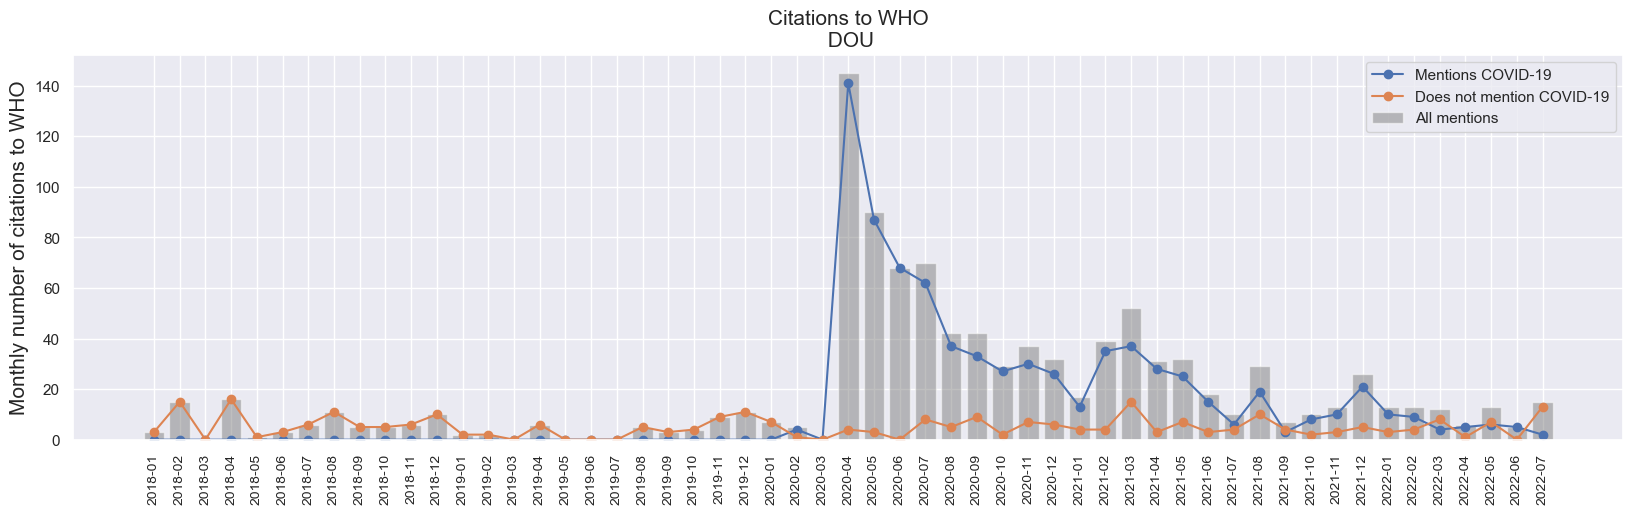

In [46]:
count_month_covid = np.array(count_month_covid)
count_month_no_covid = np.array(count_month_no_covid)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 5)
ax.plot(months_and_years, count_month_covid, '-o', label = 'Mentions COVID-19')
ax.plot(months_and_years, count_month_no_covid, '-o', label = 'Does not mention COVID-19')
ax.bar(months_and_years, count_month_covid + count_month_no_covid, color = 'gray', alpha = 0.5,
      label = 'All mentions')
ax.set_xticks(range(len(months_and_years)))
ax.set_xticklabels(months_and_years, rotation='vertical', fontsize= 10)
ax.set_ylabel('Monthly number of citations to WHO',  fontsize= 15)
ax.set_title('Citations to WHO\n DOU',  fontsize= 15)
plt.legend()

plt.savefig('Graphs/citacoes_mes.png',  bbox_inches='tight')
plt.show()

# Change point detection

In [47]:
import ruptures as rpt

In [48]:
detector = rpt.Pelt(model="rbf").fit(count_month_covid + count_month_no_covid)
change_points_all = detector.predict(pen=1) #penalty
print([months_and_years[i] for i in change_points_all[:-1]])

['2020-02', '2020-07', '2021-05']


In [49]:
detector = rpt.Pelt(model="rbf").fit(count_month_no_covid)
change_points = detector.predict(pen=1) #penalty
print([months_and_years[i] for i in change_points[:-1]])

['2018-06']


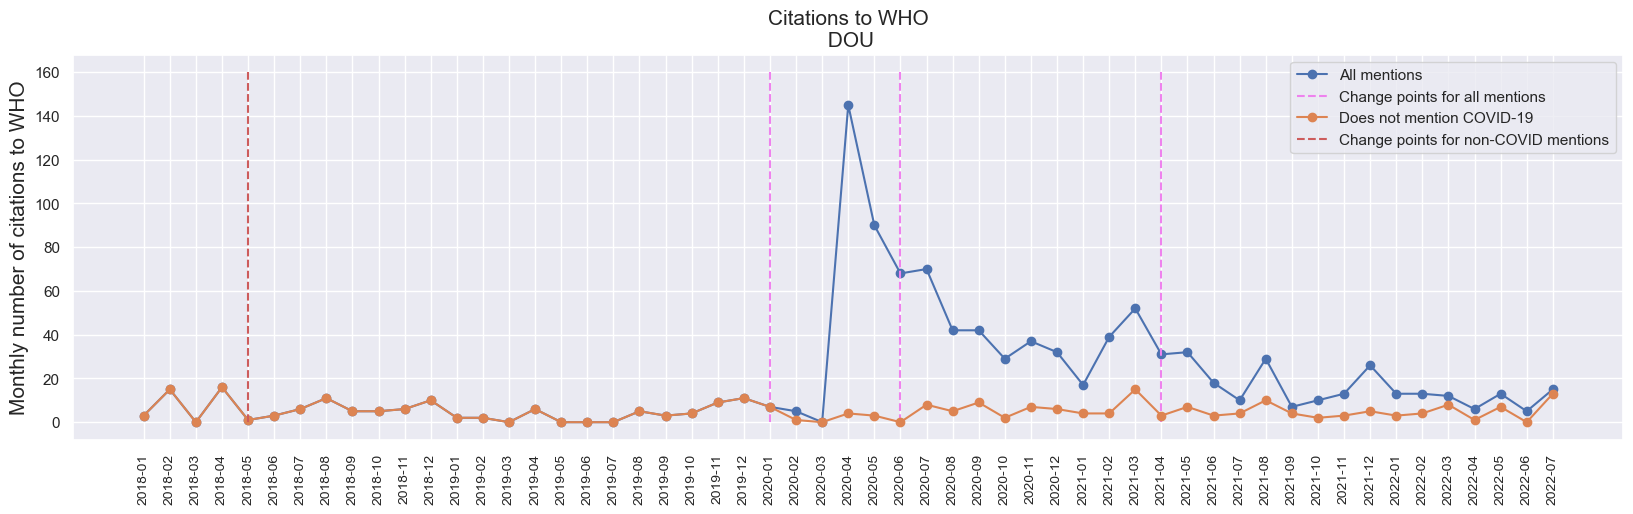

In [50]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 5)
ax.plot(months_and_years, count_month_covid + count_month_no_covid, '-o', label = 'All mentions')
plt.vlines(x=[months_and_years[i-1] for i in change_points_all[:-1]], ymin=0, ymax=160, color='violet', 
           ls='--', lw=1.5, label='Change points for all mentions')
ax.plot(months_and_years, count_month_no_covid, '-o', label = 'Does not mention COVID-19')
plt.vlines(x=[months_and_years[i-1] for i in change_points[:-1]], ymin=0, ymax=160, color='indianred', 
           ls='--', lw=1.5, label='Change points for non-COVID mentions')
ax.set_xticks(range(len(months_and_years)))
ax.set_xticklabels(months_and_years, rotation='vertical', fontsize= 10)
ax.set_ylabel('Monthly number of citations to WHO',  fontsize= 15)
ax.set_title('Citations to WHO\n DOU',  fontsize= 15)
plt.legend()

plt.savefig('Graphs/change_points.png',  bbox_inches='tight')
plt.show()

# Test for stationarity

In [51]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
'''
Code from 
https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/
'''
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(count_month_no_covid)

Results of Dickey-Fuller Test:
Test Statistic                -8.637294e+00
p-value                        5.546383e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64


In [52]:
'''
Code from 
https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/
'''
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(count_month_no_covid)

Results of KPSS Test:
Test Statistic           0.086005
p-value                  0.100000
#Lags Used               2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\hlovi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ARMA model

In [53]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\hlovi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


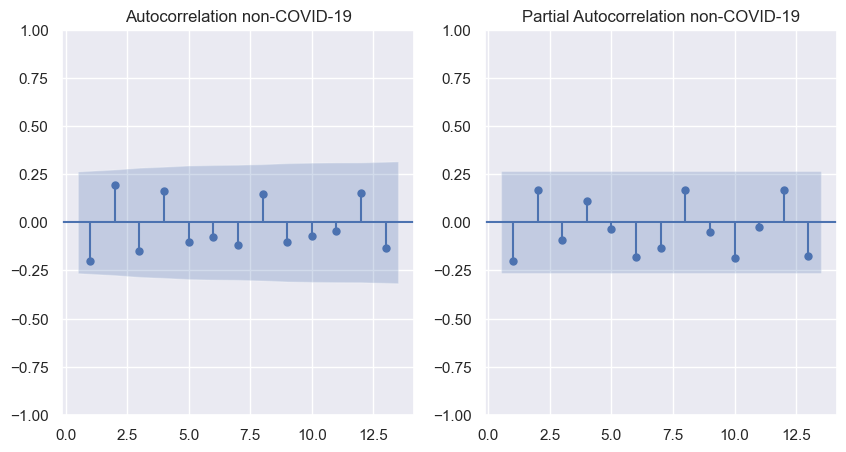

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
plot_acf(count_month_no_covid, ax = ax1, zero = False , lags = 13, title = 'Autocorrelation non-COVID-19')
plot_pacf(count_month_no_covid, ax = ax2, zero = False , lags = 13, title = 'Partial Autocorrelation non-COVID-19')
plt.savefig('Graphs/acf_pacf.png')

# Poisson test

In [55]:
index_separate = months_and_years.index('2020-01')
count_month_no_covid_bf = count_month_no_covid[:index_separate]
count_month_no_covid_af = count_month_no_covid[index_separate:]

In [56]:
print(r"lambda_bf:", np.mean(count_month_no_covid_bf))
print(r"lambda_af:", np.mean(count_month_no_covid_af))
print(r"lambda_all:", np.mean(count_month_no_covid))

lambda_bf: 5.125
lambda_af: 4.903225806451613
lambda_all: 5.0


In [57]:
print(r"lambda_bf:", '(', 
      np.mean(count_month_no_covid_bf)-1.96*np.sqrt(np.mean(count_month_no_covid_bf)/len(count_month_no_covid_bf)),
     ',' ,
      np.mean(count_month_no_covid_bf)+1.96*np.sqrt(np.mean(count_month_no_covid_bf)/len(count_month_no_covid_bf)),
     ')')
print(r"lambda_af:", '(', 
      np.mean(count_month_no_covid_af)-1.96*np.sqrt(np.mean(count_month_no_covid_af)/len(count_month_no_covid_af)),
     ',' ,
      np.mean(count_month_no_covid_af)+1.96*np.sqrt(np.mean(count_month_no_covid_af)/len(count_month_no_covid_af)),
     ')')
print(r"lambda_all:", '(', 
      np.mean(count_month_no_covid)-1.96*np.sqrt(np.mean(count_month_no_covid)/len(count_month_no_covid)),
     ',' ,
      np.mean(count_month_no_covid)+1.96*np.sqrt(np.mean(count_month_no_covid)/len(count_month_no_covid)),
     ')')

lambda_bf: ( 4.219272851976564 , 6.030727148023436 )
lambda_af: ( 4.123725713172956 , 5.68272589973027 )
lambda_all: ( 4.409037764627583 , 5.590962235372417 )


In [58]:
from statsmodels.stats.rates import test_poisson_2indep

In [59]:
sum_bf, sum_af = np.sum(count_month_no_covid_bf), np.sum(count_month_no_covid_af)
n_bf, n_af = len(count_month_no_covid_bf), len(count_month_no_covid_af)

In [60]:
test_poisson_2indep(sum_bf, n_bf, sum_af, n_af, method = 'score')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.3647800928354404
pvalue = 0.7152755662770287
distribution = 'normal'
method = 'score'
alternative = 'two-sided'
rates = (5.125, 4.903225806451613)
ratio = 1.0452302631578947
ratio_null = 1
tuple = (0.3647800928354404, 0.7152755662770287)

In [61]:
test_poisson_2indep(sum_bf, n_bf, sum_af, n_af, method = 'wald')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.36375481048249825
pvalue = 0.7160411101613577
distribution = 'normal'
method = 'wald'
alternative = 'two-sided'
rates = (5.125, 4.903225806451613)
ratio = 1.0452302631578947
ratio_null = 1
tuple = (0.36375481048249825, 0.7160411101613577)

In [62]:
test_poisson_2indep(sum_bf, n_bf, sum_af, n_af, method = 'sqrt')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.3695742734133108
pvalue = 0.7116997228224551
distribution = 'normal'
method = 'sqrt'
alternative = 'two-sided'
rates = (5.125, 4.903225806451613)
ratio = 1.0452302631578947
ratio_null = 1
tuple = (0.3695742734133108, 0.7116997228224551)